In [1]:
import utilsLY
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [2]:
import matplotlib 
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

### 一元线性回归

In [3]:
# 数据源来自于https://onlinecourses.science.psu.edu/stat501/node/325
originX, Y = utilsLY.loadDataSet('data/temperature.txt')
m, n = originX.shape
X = np.concatenate((np.ones((m,1)), originX), axis=1)

In [4]:
alpha = 0.00001
maxloop = 10000
epsilon =0.0001

In [5]:
theta, thetas, costs = utilsLY.bgd(alpha, X, Y, maxloop, epsilon)

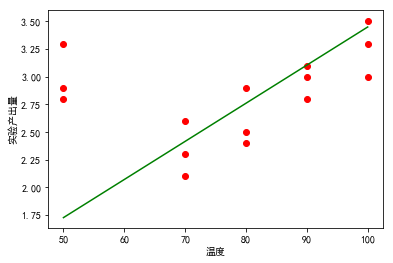

In [6]:
plt.scatter(X[:, 1].flatten(), Y[:,0].flatten(), color='r')
xCopy = X.copy()
xCopy.sort(0)
yHat = utilsLY.h(theta, xCopy)
plt.plot(xCopy[:,1],yHat,color='g')
plt.xlabel(u'温度')
plt.ylabel(u'实验产出量')
plt.show()

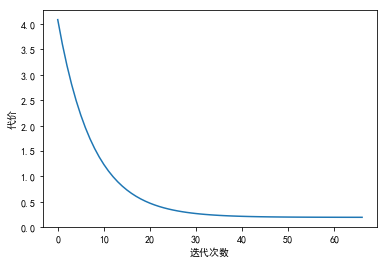

In [7]:
plt.plot(range(len(costs)), costs)
plt.xlabel(u'迭代次数')
plt.ylabel(u'代价')
plt.show()

### 多项式回归

In [8]:
X = np.column_stack((originX[:,0], np.power(originX[:,0],2)))
X, values = utilsLY.standarize(X)
X = np.concatenate((np.ones((m,1)), X), axis=1)

In [9]:
alpha = 0.01
maxLoop = 50000
epsilon =0.0000001

In [10]:
theta, thetas, costs = utilsLY.bgd(alpha, X, Y, maxloop, epsilon)

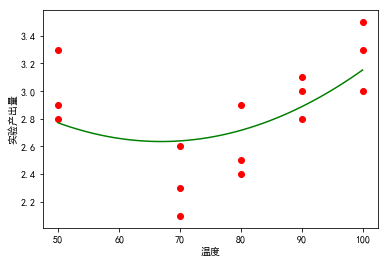

In [11]:
plt.scatter(originX[:, 0].flatten(), Y[:,0].flatten(), color='r')
xx = np.linspace(50,100,50)
xx2 = np.power(xx,2)
yHat = []
for i in range(50):
    normalizedSize = (xx[i]-values[0][0])/values[0][1]
    normalizedSize2 = (xx2[i]-values[1][0])/values[1][1]
    x = np.matrix([[1,normalizedSize, normalizedSize2]])
    
    yHat.append(utilsLY.h(theta, x)[0,0])
plt.plot(xx, yHat,color='g')
plt.xlabel(u'温度')
plt.ylabel(u'实验产出量')
plt.show()

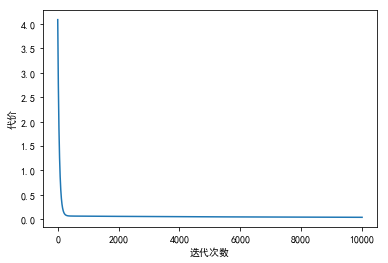

In [135]:
plt.plot(range(len(costs)), costs)
plt.xlabel(u'迭代次数')
plt.ylabel(u'代价')
plt.show()